In [1]:
import numpy as np
import sys, os, git
from matplotlib import pyplot as plt

In [2]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
path_in_folder = current_path[len(git_path)+1:]
level = path_in_folder.split("/")[-2]
tutorial_name = path_in_folder.split("/")[-1]
print("level:" , level, "& tutorial name:", tutorial_name)
sys.path.append(git_path + "/docs/sphinx/source/tutorials/figures/pyplot-perso/")
from functions import complete_panel, save_figure, set_boundaries, \
                      add_subplotlabels, set_boundaries, prepare_figure
from color_series1 import colors
path_figures = current_path[len(git_path):] + '/'
data_path = git_path + "/docs/lammpstutorials-inputs/" + level + "/" + tutorial_name + "/FreeSampling/"
print("data path: ", data_path)

level: level3 & tutorial name: free-energy-calculation
data path:  /home/simon/Git/LAMMPS/tutorials/docs/lammpstutorials-inputs/level3/free-energy-calculation/FreeSampling/


In [3]:
sigma = 3.405 # Angstrom
epsilon = 0.238 # Kcal/mol
U0 = 1.5*epsilon # Kcal/mol
delta = 0.5 # Angstrom
x0 = 5.0 # Angstrom
x = np.linspace(-25, 25, 10000)  # Angstrom
U = U0 * (np.arctan((x + x0) / delta) - np.arctan((x - x0) / delta))
F = U0 / (((x - x0)**2)/delta**2 + 1) / delta - U0 / (((x + x0)**2)/delta**2 + 1) / delta

In [4]:
R = 8.31446 # J⋅K−1⋅mol−1
T = 119.8 # K

In [5]:
rho_bulk = 0.0033 # approximately
density_10 = np.loadtxt(data_path + "density_profile_8ns.dat", skiprows=4)
x_md = density_10.T[1]
U_free_sampling_10 = - R*T * np.log(density_10.T[3] / rho_bulk)
U_free_sampling_10 /= 4184 # kcal / mol

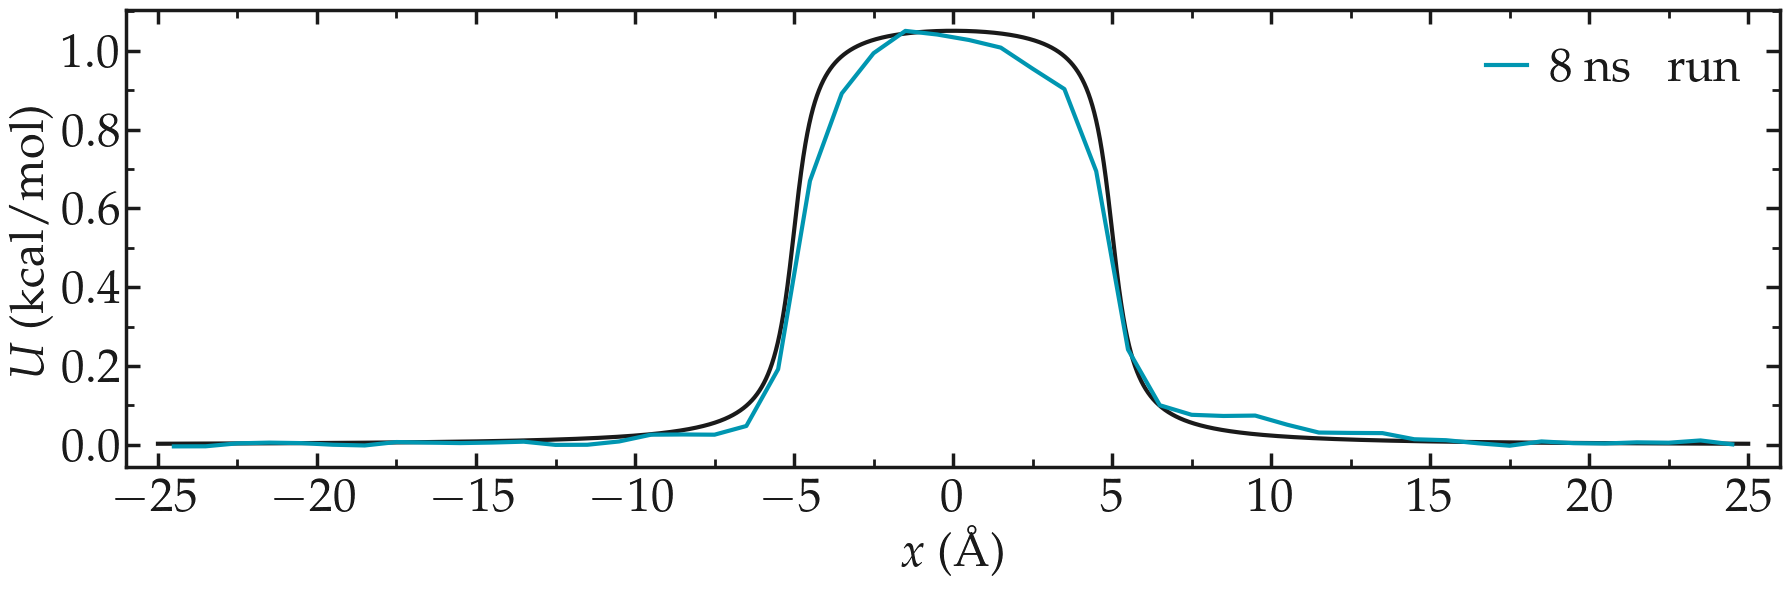

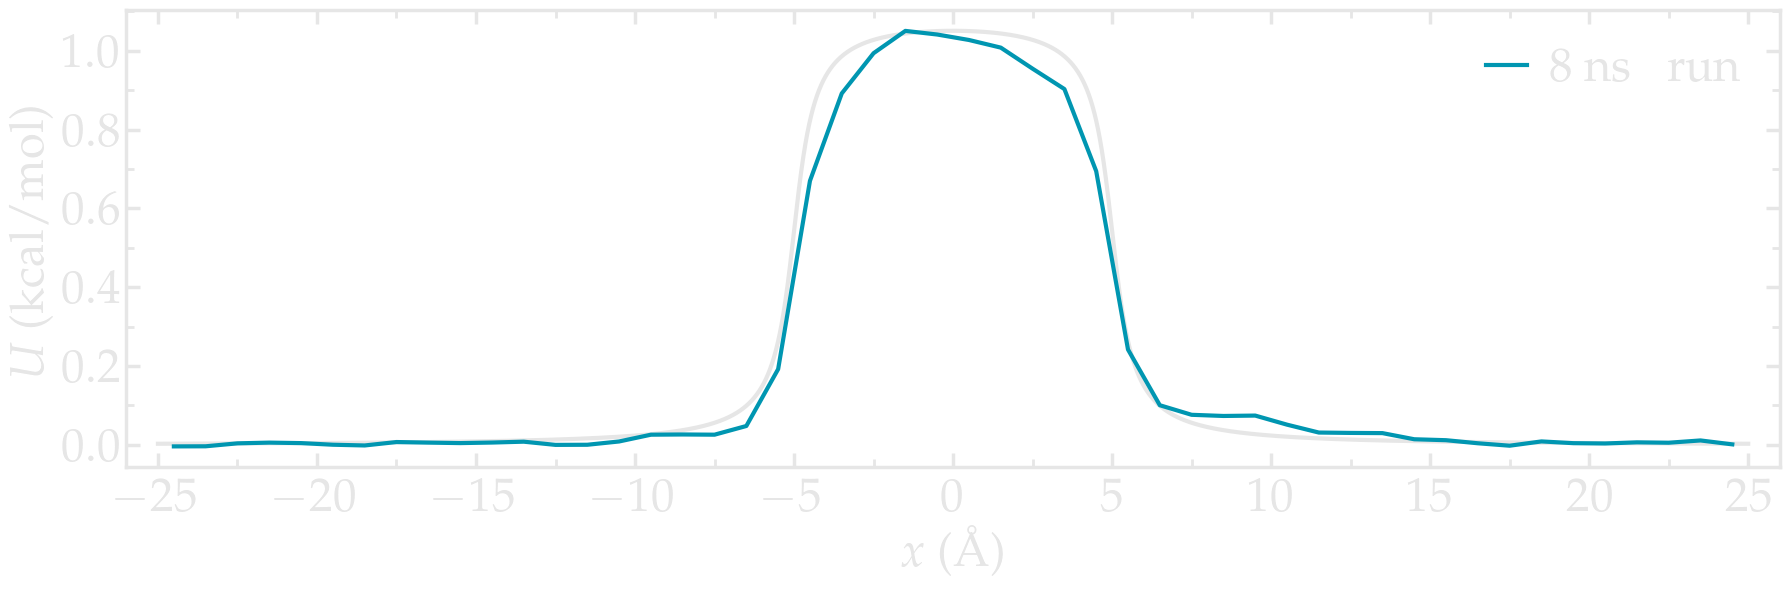

In [6]:
filename = "freesampling-potential"
for mode, mygray in zip(['light', 'dark'], [colors["mylightgray"], colors["mydarkgray"]]):    
    fig = prepare_figure(mode, transparency = True, desired_figsize=(18,6))
    ax, n, l_tot, c_tot = [], 0, 1, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    ax[-1].plot(x, U, linewidth = 3, color=mygray)
    ax[-1].plot(x_md, U_free_sampling_10, color=colors["myblue"], linewidth=3, label=r'$8 ~ \textrm{ns ~ run}$')
    complete_panel(ax[-1], r'$x ~ \textrm{(Å)}$', r'$U ~ \textrm{(kcal/mol)}$',  
        legend=True, axis_color=mygray,  xpad=8)
    set_boundaries(plt, x_ticks=np.arange(-25, 30, 5), x_boundaries=(-26, 26))
    save_figure(plt, fig, mode, git_path, path_figures, filename)

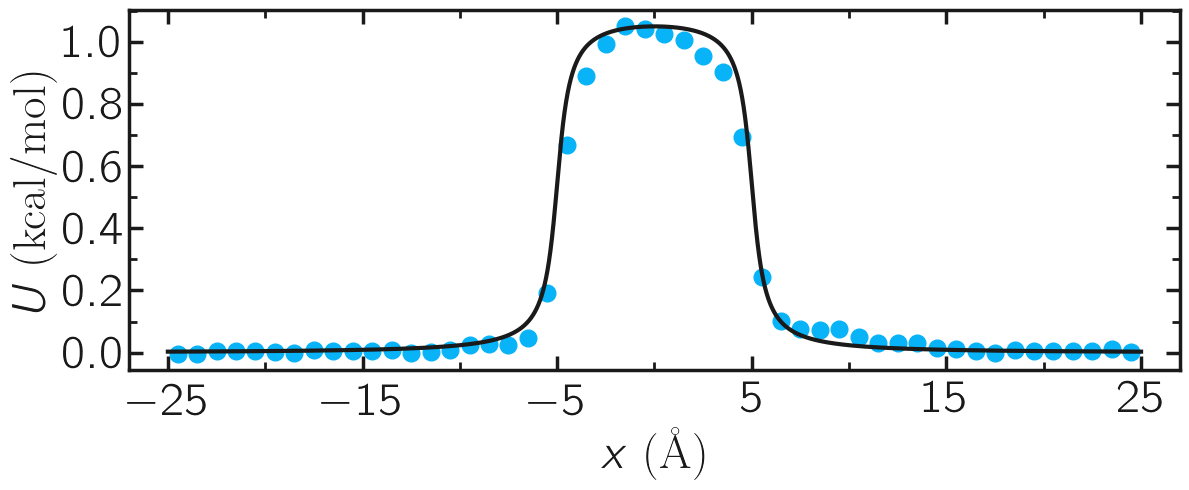

In [14]:
filename = "freesampling-article"
mode = 'light'
mygray = colors["mylightgray"]
fig = prepare_figure(mode, transparency = False, desired_figsize=(12,5), serif=False)
ax, n, l_tot, c_tot = [], 0, 1, 1
n += 1
ax.append(plt.subplot(l_tot, c_tot, n))
ax[-1].plot(x_md, U_free_sampling_10, 'o', color=colors["blue2livecom"], markersize=12, linewidth=3, label=r'$8 ~ \textrm{ns ~ run}$')
ax[-1].plot(x, U, linewidth = 3, color=mygray)
complete_panel(ax[-1], r'$x ~ \textrm{(Å)}$', r'$U ~ \textrm{(kcal/mol)}$',  
    legend=False, axis_color=mygray,  xpad=8)
set_boundaries(plt, x_ticks=np.arange(-25, 30, 10), x_boundaries=(-27, 27))
save_figure(plt, fig, mode, git_path, path_figures, filename)